#  Import Library

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score
from sklearn import model_selection
from sklearn.metrics import classification_report
from IPython.display import display

import warnings
warnings.filterwarnings('ignore')

# Prepare Data

#### load and read the data:

In [9]:
file = 'https://raw.githubusercontent.com/blk-lemon/telco-customer-churn/master/Telco-Customer-Churn.csv'
dataset = pd.read_csv(file, na_values=[" "])

In [10]:
dataset.head().T #Transposed for easier visualization

,0,1,2,3,4
customerID,7590-VHVEG,5575-GNVDE,3668-QPYBK,7795-CFOCW,9237-HQITU
gender,Female,Male,Male,Male,Female
SeniorCitizen,0,0,0,0,0
Partner,Yes,No,No,No,No
Dependents,No,No,No,No,No
tenure,1,34,2,45,2
PhoneService,No,Yes,Yes,No,Yes
MultipleLines,No phone service,No,No,No phone service,No
InternetService,DSL,DSL,DSL,DSL,Fiber optic
OnlineSecurity,No,Yes,Yes,Yes,No


In [11]:
dataset.shape

(7043, 21)

In [12]:
dataset.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

#### Change SeniorCitizen feature from int64 type into categorical type

In [13]:
dataset['SeniorCitizen']=pd.Categorical(dataset['SeniorCitizen']) #Change from int to categorical
dataset.dtypes

customerID            object
gender                object
SeniorCitizen       category
Partner               object
Dependents            object
tenure                 int64
PhoneService          object
MultipleLines         object
InternetService       object
OnlineSecurity        object
OnlineBackup          object
DeviceProtection      object
TechSupport           object
StreamingTV           object
StreamingMovies       object
Contract              object
PaperlessBilling      object
PaymentMethod         object
MonthlyCharges       float64
TotalCharges         float64
Churn                 object
dtype: object

#### remove customerID since it dose not help to predict

In [14]:
del dataset["customerID"] # Deleting the custumerID column

#### check for NA values and clean my data.

In [15]:
dataset.isnull().sum()

gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

#### drop the NA rows data

In [16]:
dataset = dataset.dropna()

# Analysis

#### split the dataset into numeric and objects

In [17]:
numerics = ['float64', 'int64']
numeric_ds = dataset.select_dtypes(include=numerics)
objects_ds = dataset.select_dtypes(exclude=numerics)

In [18]:
numeric_ds.describe()

,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000
mean,32.421786,64.798208,2283.300441
std,24.545260,30.085974,2266.771362
min,1.000000,18.250000,18.800000
25%,9.000000,35.587500,401.450000
50%,29.000000,70.350000,1397.475000
75%,55.000000,89.862500,3794.737500
max,72.000000,118.750000,8684.800000


In [19]:
dataset.groupby('Churn').size() # groupby ใช้ split data into group

Churn
No     5163
Yes    1869
dtype: int64

### Analyze numerical data


[]

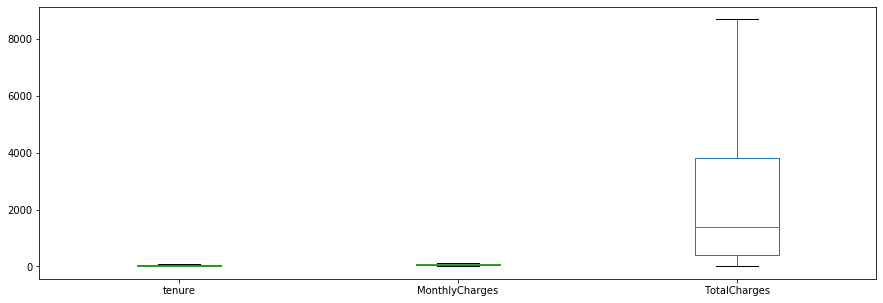

In [20]:
numeric_ds.plot(kind = 'box',figsize=(15,5))
plt.plot()

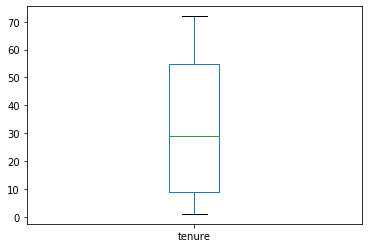

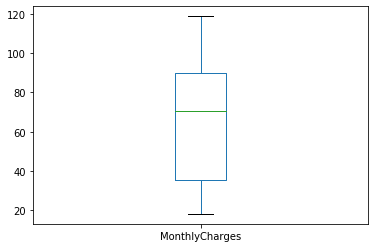

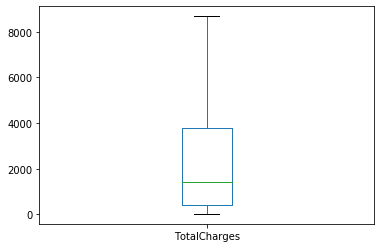

In [21]:
df_tenure = pd.DataFrame(data = numeric_ds["tenure"])
tenure_box = df_tenure.plot.box()

df_MonthlyCharges = pd.DataFrame(data = numeric_ds["MonthlyCharges"])
MonthlyCharges_box = df_MonthlyCharges.plot.box()

df_TotalCharges = pd.DataFrame(data = numeric_ds["TotalCharges"])
TotalCharges_box = df_TotalCharges.plot.box()

[]

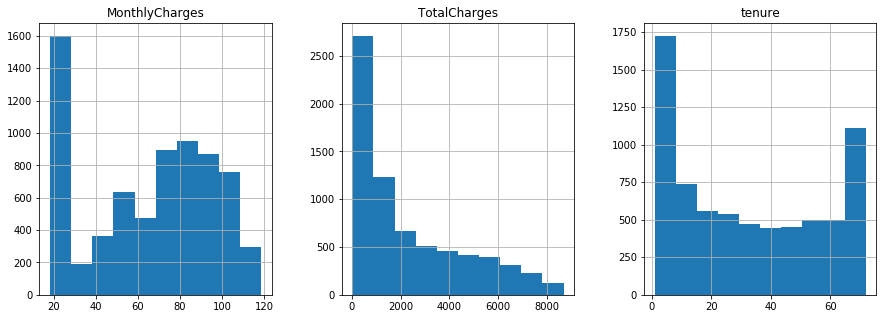

In [22]:
# histogram plots
numeric_ds.hist(layout=(1,3), figsize=(15,5))
plt.plot()

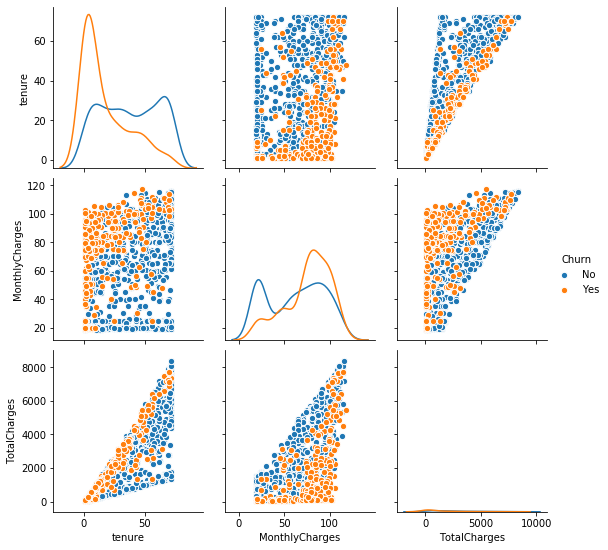

In [23]:
 numeric_ds = pd.concat([numeric_ds,dataset["Churn"]],axis=1) 
    #Add the 'Churn' variable to the numeric dataset

g = sns.PairGrid(numeric_ds.sample(n=1000), hue="Churn")
g = g.map_offdiag(plt.scatter, linewidths=1, edgecolor="w", s=40)
g = g.map_diag(sns.kdeplot)
g = g.add_legend()

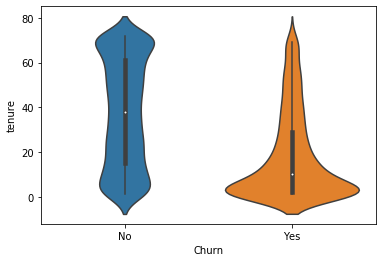

In [24]:
sns.violinplot(x="Churn", y="tenure", data=numeric_ds);

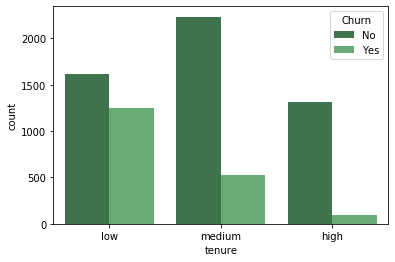

In [25]:
tenure_bins=pd.cut(numeric_ds["tenure"], bins=[0,20,60,80], labels=['low','medium','high'])
sns.countplot(x=tenure_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

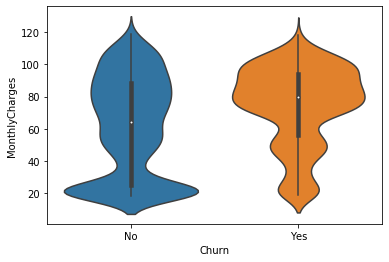

In [26]:
sns.violinplot(x="Churn", y="MonthlyCharges", data=numeric_ds);

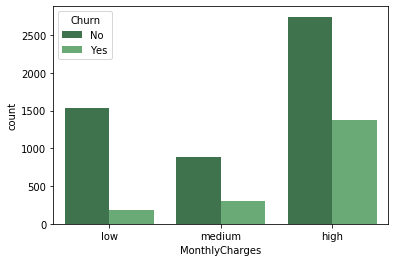

In [27]:
MonthlyCharges_bins=pd.cut(numeric_ds["MonthlyCharges"], bins=[0,35,60,130], labels=['low','medium','high'])
sns.countplot(x=MonthlyCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

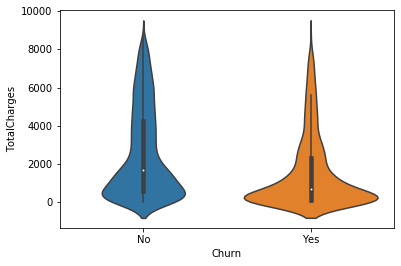

In [28]:
sns.violinplot(x="Churn", y="TotalCharges", data=numeric_ds);

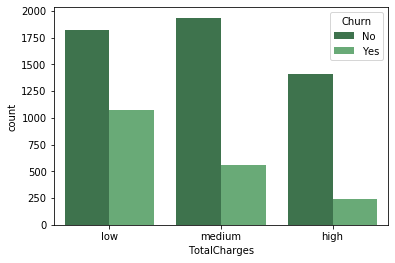

In [29]:
TotalCharges_bins=pd.cut(numeric_ds["TotalCharges"], bins=[0,1000,4000,10000], labels=['low','medium','high'])
sns.countplot(x=TotalCharges_bins, hue="Churn", data=numeric_ds, palette="Greens_d");

In [30]:
bins=pd.DataFrame([tenure_bins, MonthlyCharges_bins, TotalCharges_bins]).T
bins.head()

,tenure,MonthlyCharges,TotalCharges
0,low,low,low
1,medium,medium,medium
2,low,medium,low
3,medium,medium,medium
4,low,high,low


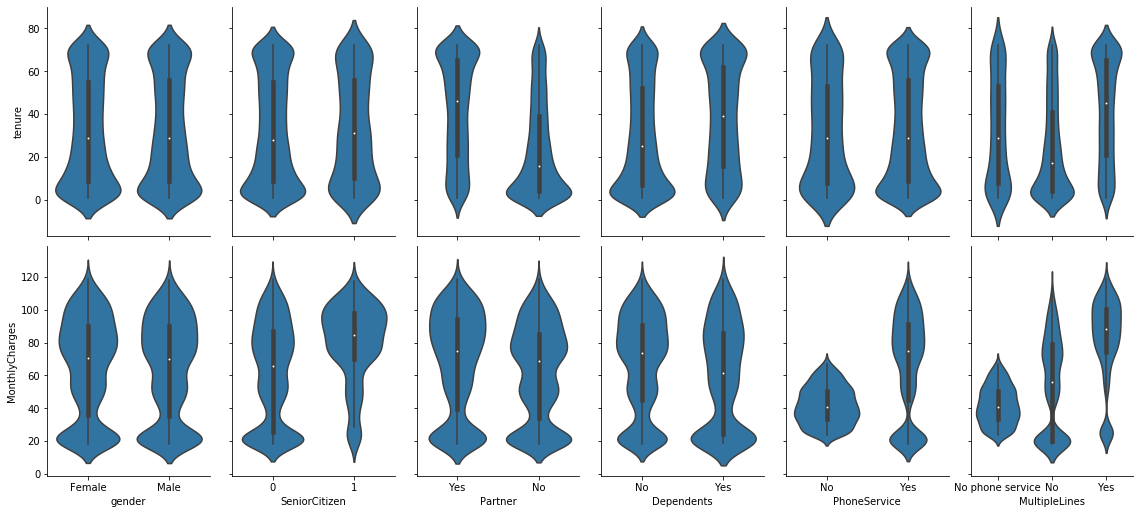

In [39]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[0:6].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

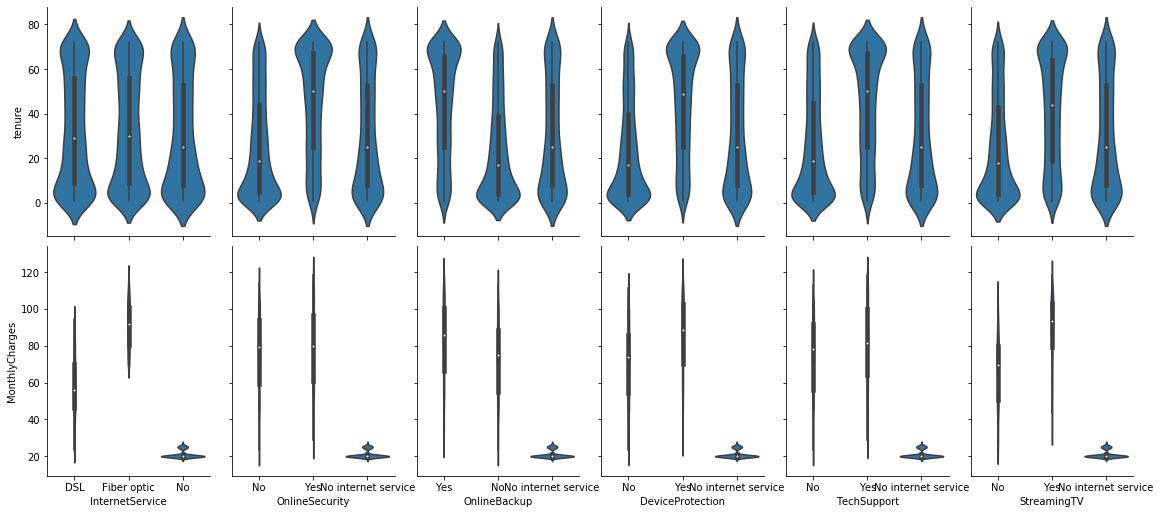

In [40]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[6:12].values,  
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
g.map(sns.violinplot);

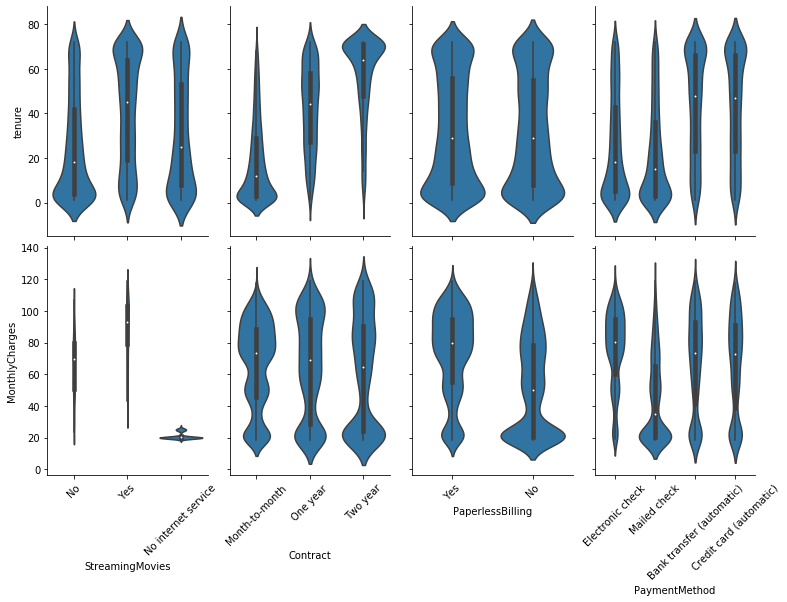

In [41]:
g = sns.PairGrid(dataset, x_vars=objects_ds.columns[12:16].values,
    y_vars=numeric_ds.columns[0:2].values, aspect=.75, size=3.5)
for ax in g.axes.flat:
   for tick in ax.get_xticklabels():
      tick.set_rotation(45)
g.map(sns.violinplot);

### Analyze numerical data

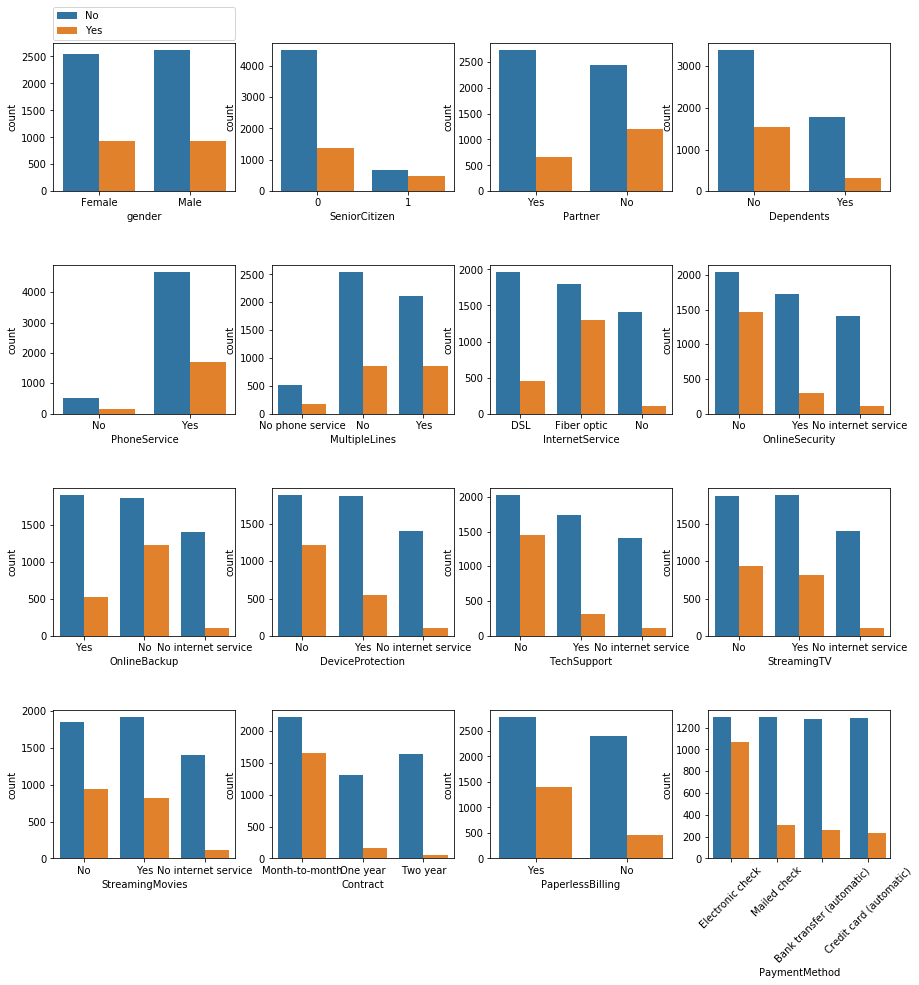

In [34]:
fig,ax =plt.subplots(4,4,figsize=(15,15))
fig.subplots_adjust(hspace=.5)
for i in range(0,16):
    g = sns.countplot(x=objects_ds.iloc[:,i], hue=objects_ds["Churn"], ax=ax[divmod(i,4)])
    g.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc=3, mode="expand", borderaxespad=0.) if i==0 else g.legend_.remove()
for tick in ax[3,3].get_xticklabels():
    tick.set_rotation(45)

# Machine Learning Models

In [35]:
data=pd.concat([bins,objects_ds],axis=1)  # Concatenate bins with object variables
for i in list(data.columns):
    data[i] = pd.Categorical(data[i]) # Convert all the variables into categorical
dummy = pd.get_dummies(data) # Transform the categorical variables

## Split Train and Test

In [36]:
features = dummy.drop(["Churn_Yes", "Churn_No"], axis=1).columns
X = dummy[features].values
Y = dummy["Churn_Yes"].values
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, Y, test_size=validation_size, random_state=seed)

In [42]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
results = []
names = []
for name, model in models:
   kfold = model_selection.KFold(n_splits=10, random_state=seed)
   cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
   results.append(cv_results)
   names.append(name)
   msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
   print(msg)

LR: 0.800001 (0.012778)
KNN: 0.765153 (0.010409)
CART: 0.728181 (0.018524)
NB: 0.701870 (0.015433)


[]

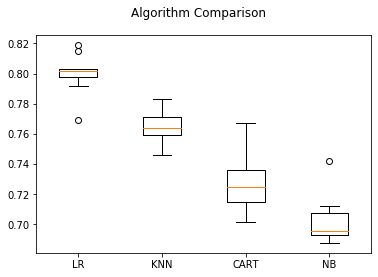

In [43]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.plot()

เราทำการ predict การ churn ของลูกค้า จากข้อมูล train ด้วย algorithm 4 แบบ คือ
- LogisticRegression
- KNeighborsClassifier
- DecisionTreeClassifier
- GaussianNB

พบว่า LogisticRegression มีความแม่นยำสูงสุดในการ predict 

จึงนำ model จาก LogisticRegression มาใช้ในการ predict ข้อมูล validation

In [44]:
# Make predictions on validation dataset
model = LogisticRegression()
model.fit(X_train, Y_train)
predictions = model.predict(X_validation)
print(accuracy_score(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))
print(classification_report(Y_validation, predictions))

0.7945984363894811
[[918  99]
 [190 200]]
              precision    recall  f1-score   support

           0       0.83      0.90      0.86      1017
           1       0.67      0.51      0.58       390

    accuracy                           0.79      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407



จากการวิเคราะห์ข้อมูล validation จะเห็นได้ว่า 
- model นี้ให้ค่าความแม่นยำ (accuracy) เกือบ 80%
- เมื่อวิเคราะห์ด้วย confusion matrix จะเห็นได้ว่า ผลลัพธ์ประเภท True Positive (200) และ True Negative (918) มีค่าสูงกว่า False Positive (99) และ False Negative (190)
- ค่า precision recall และ f1-score ของข้อมูล positive ให้ค่าที่สูงมาก

ทำให้รู้ว่า model นี้ มีประสิทธิภาพในการ predict

## Find improtant feature for cutomer churn

In [46]:
coefs = np.std(X_train, 0)*model.coef_
df_imp = pd.DataFrame(coefs).T
df_imp.columns=["importance"]
df_imp["labels"] = features
df_imp.sort_values("importance", inplace=True, ascending=False)
display(df_imp)

,importance,labels
43,0.394252,Contract_Month-to-month
23,0.335707,InternetService_Fiber optic
1,0.279644,tenure_low
7,0.191322,TotalCharges_low
50,0.137041,PaymentMethod_Electronic check
34,0.120074,TechSupport_No
25,0.117933,OnlineSecurity_No
42,0.110358,StreamingMovies_Yes
39,0.103851,StreamingTV_Yes
47,0.076957,PaperlessBilling_Yes


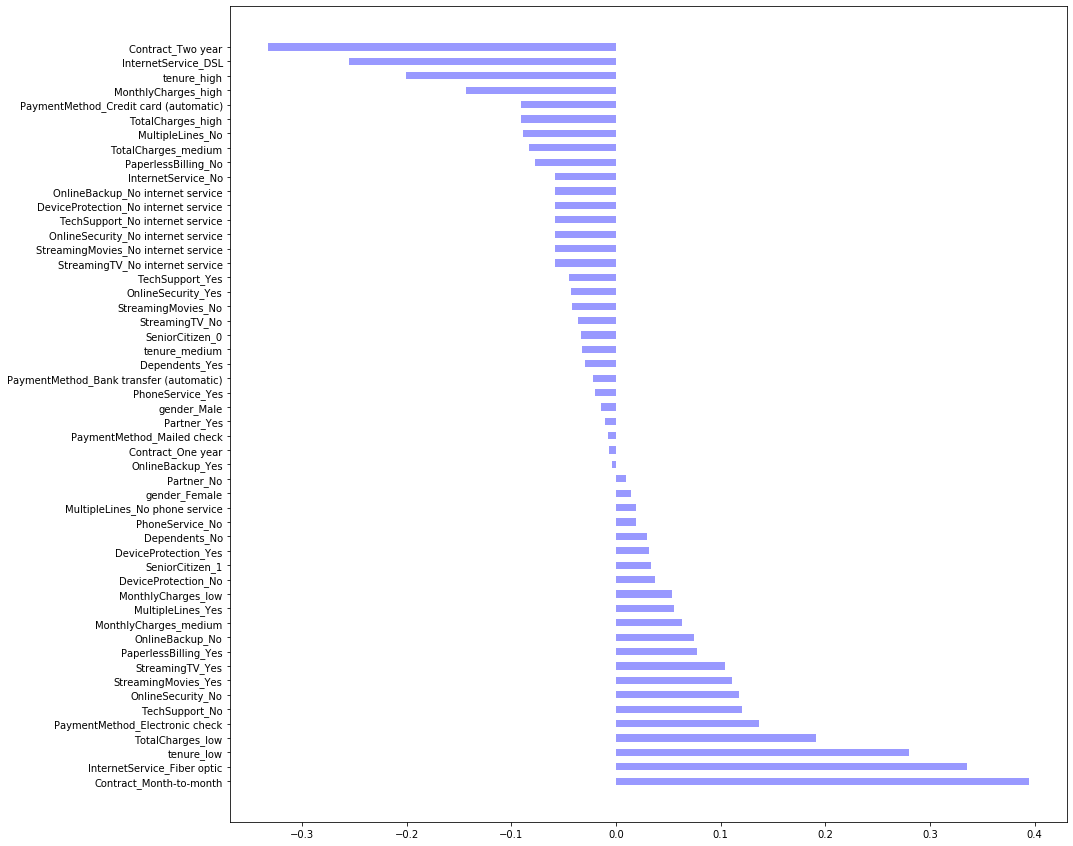

In [47]:
index = np.arange(len(df_imp))
fig = plt.figure(figsize=(15,15))
bar_width = 0.5
rects = plt.barh(index , df_imp["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_imp["labels"])
plt.show()

จากการวิเคราะห์พบว่า ลูกค้าที่มีพฤติกรรมในรูปแบบ Contract_Month-to-month เกิดจาก churn สูงที่สุด